## <div align="center">Conversion of natural-color (RGB) images to single-channel grayscale (luminance) images for bathymetric applications</div>

To use natural-color (RGB) images with the Ames Stereo Pipeline ([ASP](https://stereopipeline.readthedocs.io/en/latest/index.html)) or most other SfM or stereophotogrammetry packages they must be converted from RGB (red, green, blue) natural-color images to single-channel grayscale (luminance) images. The ASP user manual offers several ways to do this ([ASP RGB to gray](https://stereopipeline.readthedocs.io/en/latest/sfm.html#example-icebridge-dms-camera)). This Jupyter notebook demonstrates several alternative ways for image conversion depending on the environment (ice sheets vs land areas) by using the Pillow fork of the [Python Imaging Library](https://pillow.readthedocs.io/en/stable/). 

***
#### Summary: 
* <ins>**Supraglacial bathymetry:**</ins> Penetration of light into water depends on its wavelength. Penetration increases from red, to green, to blue. While proving good penetration, _the green channel also shows good contrast between the water and ice_ and is therefore used as the primary channel for Structure from Motion and stereo photogrammetry applications. 
* <ins>**Calibration flights over vegetated areas:**</ins> Lidar and camera calibration flights are typically conducted using surveyed airfield aprons/ramps as calibration targets. The airfields are often located in vegetated areas. Over vegetated areas the red or near-infrared channel is often used as the primary channel since _the luminance of the red channel typically contains the most detail_.
***

### 1) Getting started

First, load the required Python™ modules and set up processing options and parameters:

In [1]:
import os
from PIL import Image
from PIL import ImageEnhance
import matplotlib.pyplot as plt
import matplotlib.patheffects as fx
from matplotlib.gridspec import GridSpec

# set input files for conversion
f_name_bathy = r".." + os.sep + "data" + os.sep + "example_files" + os.sep + "IOCAM0_2019_GR_NASA_20190906-131338.9217.jpg"
f_name_land  = r".." + os.sep + "data" + os.sep + "example_files" + os.sep + "20190327-164832.9217.jpg"

# helper function for image enhancement
def enhance_image(rgb_image,brightness,contrast,sharpness):
    """
    SUMMARY:       adjust brightness, contrast and sharpness of three-channel (RGB) natural-color image for display 
    INPUT:         rgb_image: three-channel (RGB) natural-color image as type Image
                   brightness, contrast, sharpness: factors applied for image enhancement
    OUTPUT:        adjusted three-channel (RGB) natural-color image for display
    SYNTAX:        rgb_adj = enhance_image(rgb_image,brightness,contrast,sharpness)
    """
    # brighten the image for display
    enhancer  = ImageEnhance.Brightness(image_rgb) # 
    rgb_adj   = enhancer.enhance(brightness) 
    # increase image contrast for display
    enhancer  = ImageEnhance.Contrast(rgb_adj)
    rgb_adj   = enhancer.enhance(contrast)     
    # enhance image sharpness for display
    enhancer  = ImageEnhance.Sharpness(rgb_adj)
    rgb_adj   = enhancer.enhance(sharpness)
    return rgb_adj

## 2) Example 1: ice-covered supraglacial lake in northern Greenland

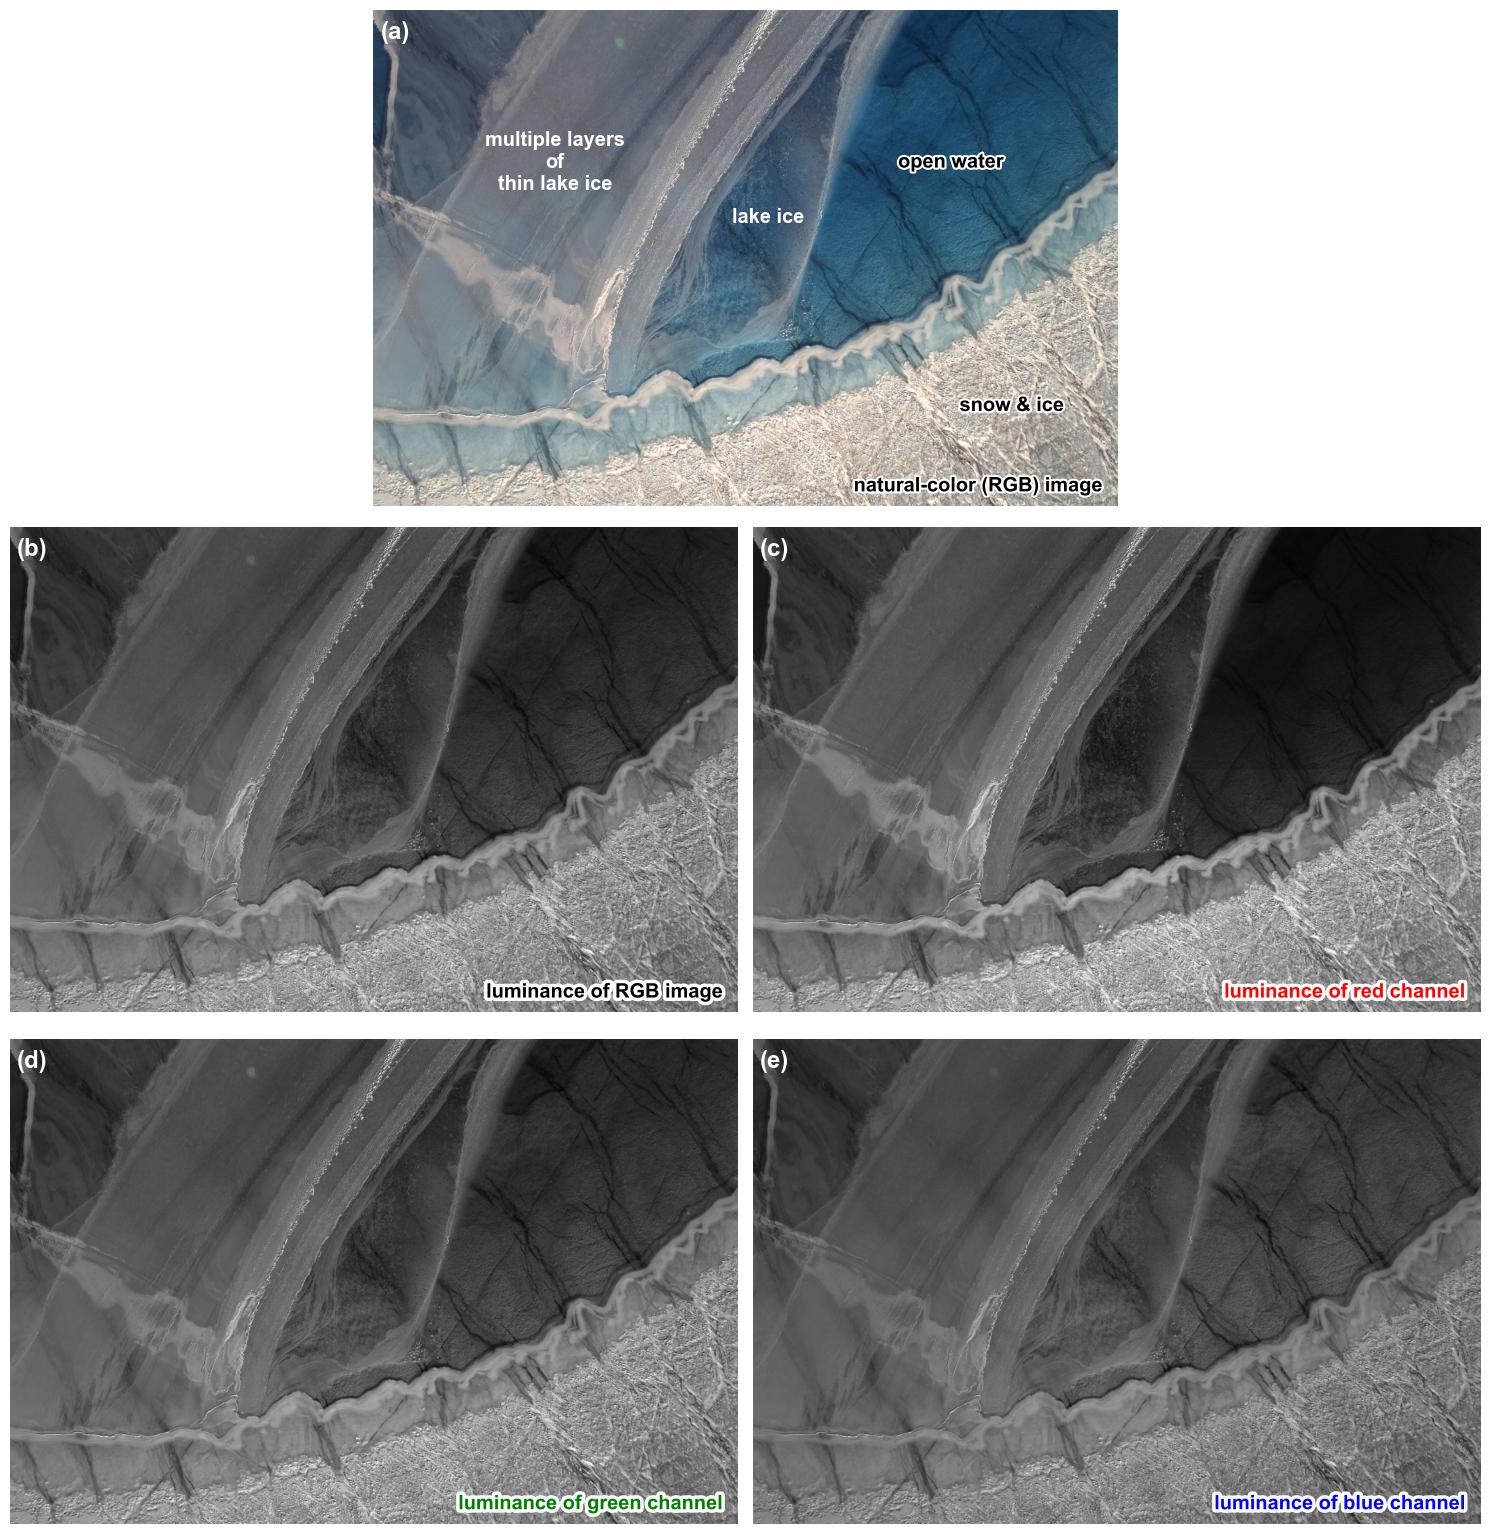

In [2]:
image_rgb = Image.open(f_name_bathy);
image_adj = enhance_image(image_rgb,1.2,1.1,1.5);
img_size  = image_rgb.size; # needed for positioning labels in plots below

# convert RGB image to luminance and separate into channels
image_lum = image_rgb.convert("L"); # L stands for luminance
# split RGB image to channels
r, g, b = image_rgb.split(); # r, g, and b are of type Image in Mode: L (luminance)

fig = plt.figure(layout="tight",figsize = (15,15.5));
gs = GridSpec(3, 2, figure=fig);
ax1 = fig.add_subplot(gs[0, :])
handle1_ax1 = ax1.imshow(image_adj)
handle2_txt = ax1.text(150,150, "(a)", fontsize = 'xx-large',font = 'Arial',fontweight = 'bold', ha = 'center', color = 'w', va = 'center')
handle2_txt = ax1.text(2*2100,2*1300, "snow & ice", fontsize = 'x-large',font = 'Arial',fontweight = 'bold', ha = 'center', color = 'k', va = 'center')
handle3_txt = ax1.text(2*1900,2*500, "open water", fontsize = 'x-large',font = 'Arial',fontweight = 'bold', ha = 'center', color = 'k',va = 'center')
handle4_txt = ax1.text(2*1300,2*700, "lake ice", fontsize = 'x-large',font = 'Arial',fontweight = 'bold', ha = 'center', color = 'w')
handle5_txt = ax1.text(2*600,2*500, "multiple layers\nof\nthin lake ice", fontsize = 'x-large',font = 'Arial',fontweight = 'bold', ha = 'center', color = 'w',va = 'center')
handle2_txt.set_path_effects([fx.Stroke(linewidth=3.0, foreground='1.0'),fx.Normal()])
handle3_txt.set_path_effects([fx.Stroke(linewidth=3.0, foreground='1.0'),fx.Normal()])
handle6_txt = ax1.text(img_size[0]-100,img_size[1]-100, "natural-color (RGB) image", fontsize = 'x-large',font = 'Arial',fontweight = 'bold', ha = 'right', color = 'k')
handle6_txt.set_path_effects([fx.Stroke(linewidth=3.0, foreground='1.0'),fx.Normal()])
plt.axis('off')

# plot panels
ax2 = fig.add_subplot(gs[1, 0])
handle1_ax1 = ax2.imshow(image_lum,cmap = 'gray')
handle2_txt = ax2.text(150,150, "(b)", fontsize = 'xx-large',font = 'Arial',fontweight = 'bold', ha = 'center', color = 'w', va = 'center')
handle2_ax1 = ax2.text(img_size[0]-100,img_size[1]-100, "luminance of RGB image", fontsize = 'x-large',font = 'Arial',fontweight = 'bold', ha = 'right', color = 'k')
handle2_ax1.set_path_effects([fx.Stroke(linewidth=5.0, foreground='1.0'),fx.Normal()])    
plt.axis('off')

ax3 = fig.add_subplot(gs[1,1])
handle2_ax2 = ax3.imshow(r,cmap = 'gray')
handle2_txt = ax3.text(150,150, "(c)", fontsize = 'xx-large',font = 'Arial',fontweight = 'bold', ha = 'center', color = 'w', va = 'center')
handle2_ax2 = ax3.text(img_size[0]-100,img_size[1]-100, "luminance of red channel", fontsize = 'x-large',font = 'Arial',fontweight = 'bold', ha = 'right', color = 'red')
handle2_ax2.set_path_effects([fx.Stroke(linewidth=5.0, foreground='1.0'),fx.Normal()])
plt.axis('off')

ax4 = fig.add_subplot(gs[2, 0])
handle2_ax3 = ax4.imshow(g,cmap = 'gray')
handle2_txt = ax4.text(150,150, "(d)", fontsize = 'xx-large',font = 'Arial',fontweight = 'bold', ha = 'center', color = 'w', va = 'center')
handle2_ax3 = ax4.text(img_size[0]-100,img_size[1]-100, "luminance of green channel", fontsize = 'x-large',font = 'Arial',fontweight = 'bold', ha = 'right', color = 'green')
handle2_ax3.set_path_effects([fx.Stroke(linewidth=5.0, foreground='1.0'),fx.Normal()])
plt.axis('off')

ax5 = fig.add_subplot(gs[2, 1])
handle2_ax4 = ax5.imshow(b,cmap = 'gray')
handle2_txt = ax5.text(150,150, "(e)", fontsize = 'xx-large',font = 'Arial',fontweight = 'bold', ha = 'center', color = 'w', va = 'center')
handle2_ax4 = ax5.text(img_size[0]-100,img_size[1]-100, "luminance of blue channel", fontsize = 'x-large',font = 'Arial',fontweight = 'bold', ha = 'right', color = 'blue')
handle2_ax4.set_path_effects([fx.Stroke(linewidth=5.0, foreground='1.0'),fx.Normal()])
plt.axis('off')
plt.show()

Penetration of light into water depends on its wavelength. Penetration increases from red, to green, to blue as can be seen in the image above, that shows increasing detail in the lake bottom from red, to green, to blue. While providing good penetration, the green channel also shows good contrast between the water and ice and is therefore used as the primary channel. 

## 2) Example 2: NASA Wallops Flight Facility calibration flight over airfield apron/ramp

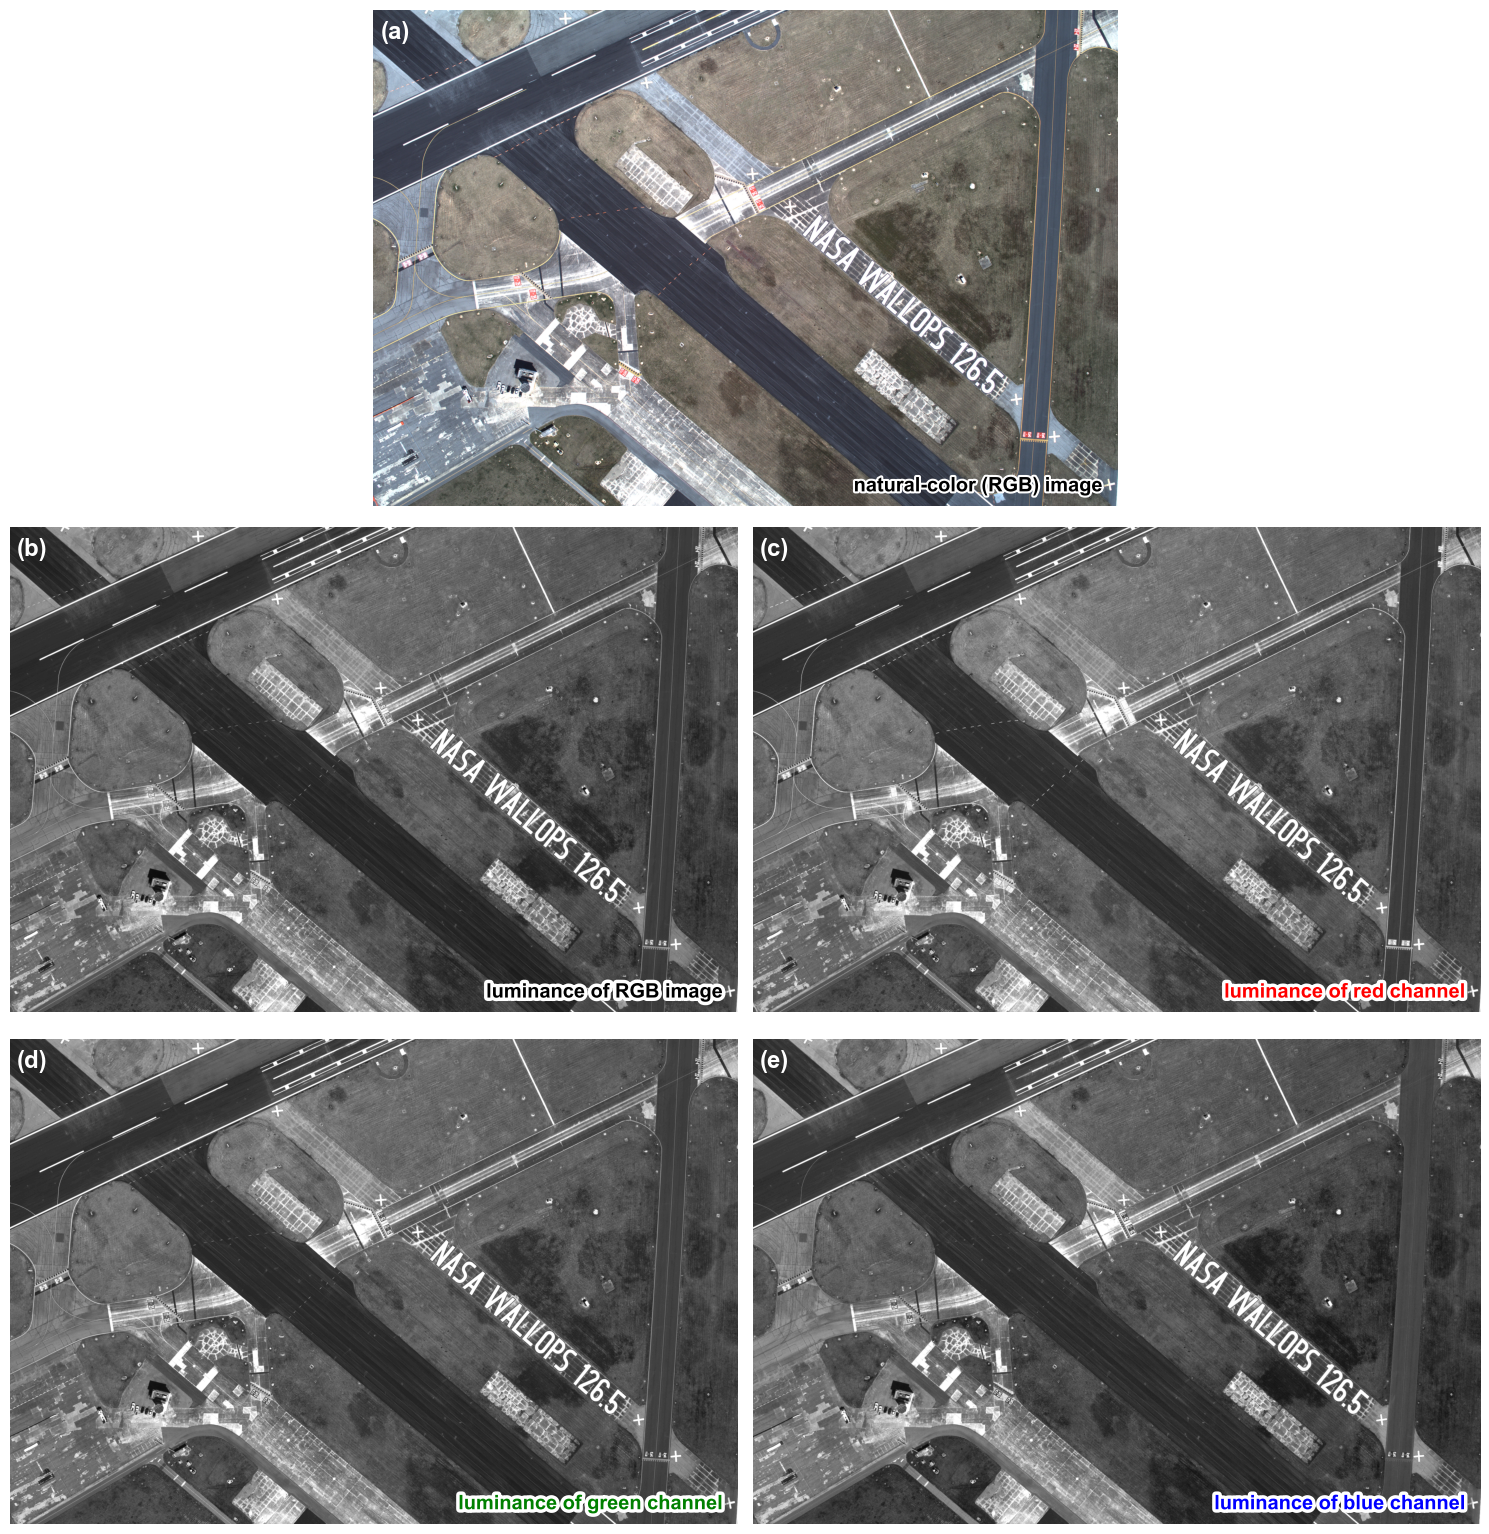

In [3]:
image_rgb = Image.open(f_name_land)
image_adj = enhance_image(image_rgb,1.2,1.1,1.5) 
img_size  = image_rgb.size # needed for positioning labels in plots below

# convert RGB image to luminance and separate into channels
image_lum = image_rgb.convert("L") # L stands for luminance
# split RGB image to channels
r, g, b = image_rgb.split() # r, g, and b are of type Image in Mode: L (luminance)

fig = plt.figure(layout="tight",figsize = (15,15.5))
gs = GridSpec(3, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, :])
handle1_ax1 = ax1.imshow(image_adj)
handle2_txt = ax1.text(150,150, "(a)", fontsize = 'xx-large',font = 'Arial',fontweight = 'bold', ha = 'center', color = 'w', va = 'center')
handle6_txt = ax1.text(img_size[0]-100,img_size[1]-100, "natural-color (RGB) image", fontsize = 'x-large',font = 'Arial',fontweight = 'bold', ha = 'right', color = 'k')
handle6_txt.set_path_effects([fx.Stroke(linewidth=3.0, foreground='1.0'),fx.Normal()])
plt.axis('off')

# plot panels
ax2 = fig.add_subplot(gs[1, 0])
handle1_ax1 = ax2.imshow(image_lum,cmap = 'gray')
handle2_txt = ax2.text(150,150, "(b)", fontsize = 'xx-large',font = 'Arial',fontweight = 'bold', ha = 'center', color = 'w', va = 'center')
handle2_ax1 = ax2.text(img_size[0]-100,img_size[1]-100, "luminance of RGB image", fontsize = 'x-large',font = 'Arial',fontweight = 'bold', ha = 'right', color = 'k')
handle2_ax1.set_path_effects([fx.Stroke(linewidth=5.0, foreground='1.0'),fx.Normal()])    
plt.axis('off')

ax3 = fig.add_subplot(gs[1,1])
handle2_ax2 = ax3.imshow(r,cmap = 'gray')
handle2_txt = ax3.text(150,150, "(c)", fontsize = 'xx-large',font = 'Arial',fontweight = 'bold', ha = 'center', color = 'w', va = 'center')
handle2_ax2 = ax3.text(img_size[0]-100,img_size[1]-100, "luminance of red channel", fontsize = 'x-large',font = 'Arial',fontweight = 'bold', ha = 'right', color = 'red')
handle2_ax2.set_path_effects([fx.Stroke(linewidth=5.0, foreground='1.0'),fx.Normal()])
plt.axis('off')

ax4 = fig.add_subplot(gs[2, 0])
handle2_ax3 = ax4.imshow(g,cmap = 'gray')
handle2_txt = ax4.text(150,150, "(d)", fontsize = 'xx-large',font = 'Arial',fontweight = 'bold', ha = 'center', color = 'w', va = 'center')
handle2_ax3 = ax4.text(img_size[0]-100,img_size[1]-100, "luminance of green channel", fontsize = 'x-large',font = 'Arial',fontweight = 'bold', ha = 'right', color = 'green')
handle2_ax3.set_path_effects([fx.Stroke(linewidth=5.0, foreground='1.0'),fx.Normal()])
plt.axis('off')

ax5 = fig.add_subplot(gs[2, 1])
handle2_ax4 = ax5.imshow(b,cmap = 'gray')
handle2_txt = ax5.text(150,150, "(e)", fontsize = 'xx-large',font = 'Arial',fontweight = 'bold', ha = 'center', color = 'w', va = 'center')
handle2_ax4 = ax5.text(img_size[0]-100,img_size[1]-100, "luminance of blue channel", fontsize = 'x-large',font = 'Arial',fontweight = 'bold', ha = 'right', color = 'blue')
handle2_ax4.set_path_effects([fx.Stroke(linewidth=5.0, foreground='1.0'),fx.Normal()])
plt.axis('off')
plt.show()

Over vegetated areas the red or near infrared channels are often used as the primary channel. The reason for this is a rapid increase in reflectance towards the red and infrared spectrum over vegetation, the so called "red edge". The result is higher clarity and detail in red luminance images over vegetation compared to green and blue or a combined RGB converted luminance.  